In [1]:
import pandas as pd
from pulp import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Project lists
df_p = pd.read_excel('warehouses.xlsx', sheet_name = 'projects')
df_p

,PROJECT NUMBER,PROJECT DESCRIPTION,CUSTOMER,VERTICAL,WH,SQM,COUNTRY,TURNOVER,YEAR 1,YEAR 2,YEAR 3,TOTAL,ROI,OPERATIONS,SUSTAINABILITY,BUSINESS DEV,HSE,DIGITAL TRANSFORMATION,CSR,OPERATIONAL EXCELLENCE
0,1,5S VISUAL MANAGEMENT,LUXURY 3,LUXURY,WH01,4000,CHINA,5000000,11500.0,3500,2450.0,17450,-750.0,WAREHOUSING,False,False,True,False,False,True
1,2,ADDITIONAL SPACE WITH RACKING,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000.0,250000,300000.0,750000,180000.0,WAREHOUSING,False,True,False,False,False,False
2,3,ADDITIONAL SPACE WITH RACKING,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE,4500000,220000.0,320000,350000.0,890000,213600.0,WAREHOUSING,False,True,False,False,False,False
3,4,ADDITIONAL SPACE WITH RACKING,FASHION 1,FASHION,WH01,2000,CHINA,1000000,75000.0,100000,110000.0,285000,49875.0,WAREHOUSING,False,True,False,False,False,False
4,5,ADDITIONAL SPACE WITH RACKING,FASHION 2,FASHION,WH01,500,CHINA,850000,90000.0,110000,130000.0,330000,70620.0,WAREHOUSING,False,True,False,False,False,False
5,6,ADDITIONAL RACKING,FASHION 6,FASHION,WH04,2000,CHINA,2150000,115000.0,115000,115000.0,345000,51750.0,WAREHOUSING,False,True,False,False,False,False
6,7,AIR CONDITIONING FOR OFFICE (HSE),AUTOMOTIVE 2,AUTOMOTIVE,WH02,2500,KOREA,2150000,35000.0,35000,35000.0,105000,-17500.0,WAREHOUSING,False,False,True,False,False,False
7,8,AUTOMATED ACCESS POINT WITH FINGERPRINT FOR WO...,FASHION 3,FASHION,WH01,1500,CHINA,2500000,1875.0,1875,1875.0,5625,-3750.0,WAREHOUSING,False,False,True,True,False,False
8,9,AUTOMATED GUIDED VEHICLES,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000.0,200000,200000.0,600000,-30000.0,TRANSPORTATION,False,True,False,True,False,True
9,10,AUTOMATED ORDER PICKER (PRODUCTIVITY),JEWELRY 1,JEWELRY,WH01,2000,CHINA,4000000,65000.0,50000,50000.0,165000,16500.0,TRANSPORTATION,False,False,True,True,False,True


In [3]:
# Fill NULL values with zero for numerical columns
for COL in ['TURNOVER', 'YEAR 1', 'YEAR 2', 'YEAR 3', 'ROI']:
    df_p[COL] =  df_p[COL].fillna(0).astype(int)
    
# Create project description linked to the customer
df_p['PROJECT DESCRIPTION'] = df_p['PROJECT DESCRIPTION'].astype(str) + '-' + df_p['CUSTOMER']

print("{:,} projects in your list.".format(len(df_p)))
df_p.head()

58 projects in your list.


,PROJECT NUMBER,PROJECT DESCRIPTION,CUSTOMER,VERTICAL,WH,SQM,COUNTRY,TURNOVER,YEAR 1,YEAR 2,YEAR 3,TOTAL,ROI,OPERATIONS,SUSTAINABILITY,BUSINESS DEV,HSE,DIGITAL TRANSFORMATION,CSR,OPERATIONAL EXCELLENCE
0,1,5S VISUAL MANAGEMENT-LUXURY 3,LUXURY 3,LUXURY,WH01,4000,CHINA,5000000,11500,3500,2450,17450,-750,WAREHOUSING,False,False,True,False,False,True
1,2,ADDITIONAL SPACE WITH RACKING-LUXURY 4,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000,250000,300000,750000,180000,WAREHOUSING,False,True,False,False,False,False
2,3,ADDITIONAL SPACE WITH RACKING-AUTOMOTIVE 1,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE,4500000,220000,320000,350000,890000,213600,WAREHOUSING,False,True,False,False,False,False
3,4,ADDITIONAL SPACE WITH RACKING-FASHION 1,FASHION 1,FASHION,WH01,2000,CHINA,1000000,75000,100000,110000,285000,49875,WAREHOUSING,False,True,False,False,False,False
4,5,ADDITIONAL SPACE WITH RACKING-FASHION 2,FASHION 2,FASHION,WH01,500,CHINA,850000,90000,110000,130000,330000,70620,WAREHOUSING,False,True,False,False,False,False


## EDA

### Number of projects per Vertical

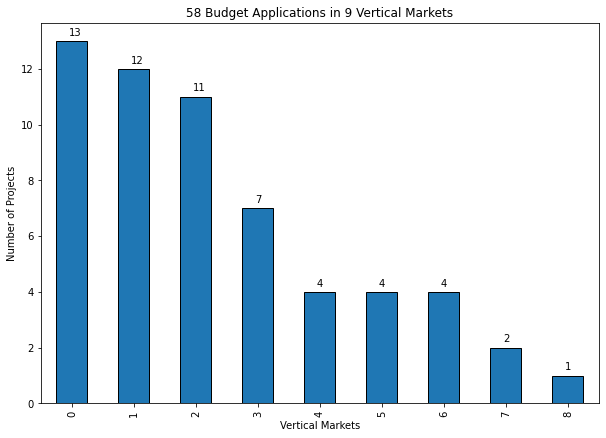

In [4]:
df_bar = pd.DataFrame(df_p.groupby(['VERTICAL'])['PROJECT NUMBER'].count())
df_bar.sort_values(by = 'PROJECT NUMBER', ascending = False, inplace = True)
df_bar.reset_index(inplace = True)
ax = df_bar.plot.bar(figsize = (10, 7), edgecolor = 'black', y = 'PROJECT NUMBER', legend = False)
plt.xlabel('Vertical Markets')
plt.ylabel('Number of Projects')
plt.title('{} Budget Applications in 9 Vertical Markets'.format(len(df_p)))

# Add labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1 +0.2, p.get_height() * 1 + 0.2))
    
plt.show()

### Budget application amount per Vertical

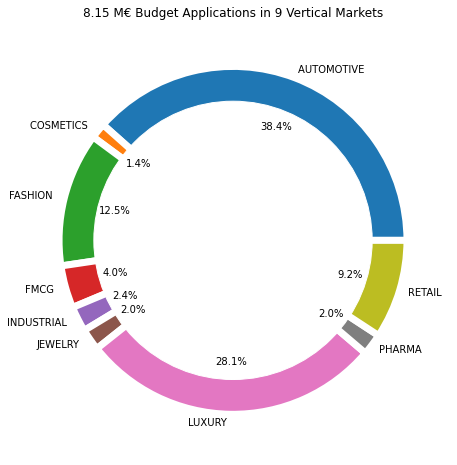

In [5]:
my_circle = plt.Circle( (0,0), 0.8, color='white')
df_p.groupby(['VERTICAL']).sum().plot.pie(figsize=(8, 8), y='TOTAL', legend= False, pctdistance=0.7,
                                          autopct='%1.1f%%', labeldistance=1.05, 
                                          wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.xlabel('Business Vertical')
plt.title('{:.2f} M€ Budget Applications in 9 Vertical Markets'.format(df_p['TOTAL'].sum()/1e6))

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

### Budget application per Country

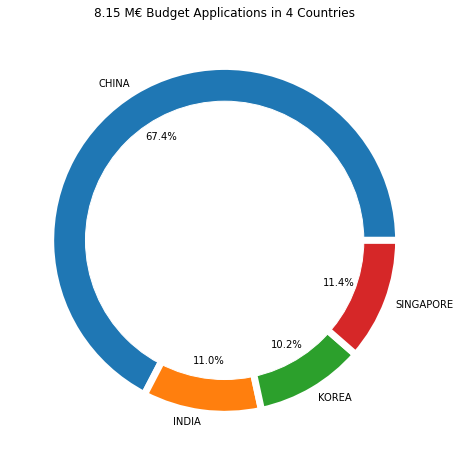

In [6]:
df_budg = pd.DataFrame((df_p.groupby(['COUNTRY'])['TOTAL'].sum()/1e6).round(2))
my_circle = plt.Circle( (0,0), 0.8, color='white')
df_budg.plot.pie(figsize=(8, 8), y='TOTAL', legend= False, pctdistance=0.7,
                                          autopct='%1.1f%%', labeldistance=1.05, 
                                          wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.xlabel('Business Vertical')
plt.ylabel('(M€)')
plt.title('{:.2f} M€ Budget Applications in 4 Countries'.format(df_p['TOTAL'].sum()/1e6))

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

### Budget allocation per management objective

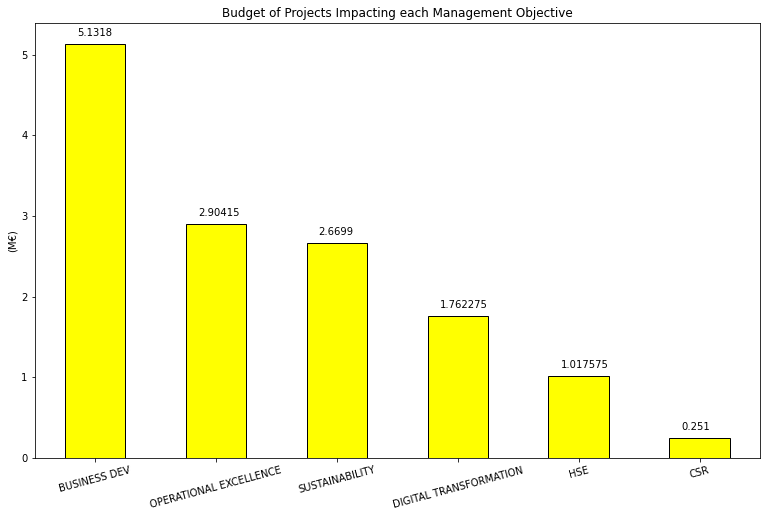

In [7]:
OBJ = ['SUSTAINABILITY', 'BUSINESS DEV', 'HSE', 'DIGITAL TRANSFORMATION',
       'CSR', 'OPERATIONAL EXCELLENCE']
df_obj = df_p.copy()
for COL in OBJ:
    # If in the objective column is false, then when summing up per row, it's going to be zero.
    df_obj[COL] = df_obj[COL]*df_obj['TOTAL']
df_obj = pd.DataFrame(df_obj[OBJ].sum(axis = 0)/1E6)
# Name the sum column as 'BUDGET'
df_obj.columns = ['BUDGET']
df_obj.sort_values(by = 'BUDGET', ascending = False, inplace = True)

ax = df_obj.plot.bar(figsize = (13, 8), edgecolor = 'black', y = 'BUDGET', color = 'yellow', legend = False)
plt.xticks(rotation = 15)
plt.ylabel('(M€)')
plt.title('Budget of Projects Impacting each Management Objective'.format(len(df_p)))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1 +0.1, p.get_height() * 1 + 0.1))
 
plt.show()

## Model 1: Maximize ROI

In [8]:
# 1. Initialize Class
model = LpProblem("Budget_Planning_MaxROI", LpMaximize)

# 2. Define Decision Variables
# Project Name
projects = list(df_p['PROJECT DESCRIPTION'].values)
# Project ROI
roi = list(df_p['ROI'].values)
# Create dictionary
P = LpVariable.dicts("P", [j for j in range(len(projects))],
                    lowBound = 0, cat = 'Binary')

# 3. Define Objective Function
# Total ROI
model += lpSum([roi[i] * P[i] for i in range(len(projects))]) 

# 4. Define Constraints
# Budget limit per year
BUDGET_LIMIT = [1250000, 1500000, 1750000]
for j in range(3):
    model += lpSum([P[i] * df_p.loc[i, 'YEAR {}'.format(j+1)] for i in range(len(projects))]) <= BUDGET_LIMIT[j]

# 5. Solve model
status = model.solve()
print(LpStatus[status])
print("Return of Investment = {:,} Euros".format(round(value(model.objective), 2)))

# Results 
MAX_BUDGET = sum(BUDGET_LIMIT)/1e6
ACTUAL_BUDGET = round(sum([P[i].varValue * df_p.loc[i, 'TOTAL'] for i in range(len(projects))])/1e6,2)
project_allocation = int(sum([P[i].varValue for i in range(len(projects))]))
LIST_PROJECTS = []
for i in range(len(projects)):
    LIST_PROJECTS.append(P[i].varValue)

print('{}/{} Projects Accepted with a Budget Allocation of {:,}/{:,} M€'.format(project_allocation, len(df_p), ACTUAL_BUDGET, MAX_BUDGET))

Optimal
Return of Investment = 1,050,976.0 Euros
36/58 Projects Accepted with a Budget Allocation of 4.07/4.5 M€


### Add the results

In [9]:
df_result = df_p.copy()
df_result['ALLOCATION'] = LIST_PROJECTS
df_result['TOTAL'] = df_result['ALLOCATION'] * df_result['TOTAL']
df_result['ROI'] = df_result['ALLOCATION'] * df_result['ROI']
df_result

,PROJECT NUMBER,PROJECT DESCRIPTION,CUSTOMER,VERTICAL,WH,SQM,COUNTRY,TURNOVER,YEAR 1,YEAR 2,...,TOTAL,ROI,OPERATIONS,SUSTAINABILITY,BUSINESS DEV,HSE,DIGITAL TRANSFORMATION,CSR,OPERATIONAL EXCELLENCE,ALLOCATION
0,1,5S VISUAL MANAGEMENT-LUXURY 3,LUXURY 3,LUXURY,WH01,4000,CHINA,5000000,11500,3500,...,0.0,-0.0,WAREHOUSING,False,False,True,False,False,True,0.0
1,2,ADDITIONAL SPACE WITH RACKING-LUXURY 4,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000,250000,...,750000.0,180000.0,WAREHOUSING,False,True,False,False,False,False,1.0
2,3,ADDITIONAL SPACE WITH RACKING-AUTOMOTIVE 1,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE,4500000,220000,320000,...,890000.0,213600.0,WAREHOUSING,False,True,False,False,False,False,1.0
3,4,ADDITIONAL SPACE WITH RACKING-FASHION 1,FASHION 1,FASHION,WH01,2000,CHINA,1000000,75000,100000,...,285000.0,49875.0,WAREHOUSING,False,True,False,False,False,False,1.0
4,5,ADDITIONAL SPACE WITH RACKING-FASHION 2,FASHION 2,FASHION,WH01,500,CHINA,850000,90000,110000,...,330000.0,70620.0,WAREHOUSING,False,True,False,False,False,False,1.0
5,6,ADDITIONAL RACKING-FASHION 6,FASHION 6,FASHION,WH04,2000,CHINA,2150000,115000,115000,...,345000.0,51750.0,WAREHOUSING,False,True,False,False,False,False,1.0
6,7,AIR CONDITIONING FOR OFFICE (HSE)-AUTOMOTIVE 2,AUTOMOTIVE 2,AUTOMOTIVE,WH02,2500,KOREA,2150000,35000,35000,...,0.0,-0.0,WAREHOUSING,False,False,True,False,False,False,0.0
7,8,AUTOMATED ACCESS POINT WITH FINGERPRINT FOR WO...,FASHION 3,FASHION,WH01,1500,CHINA,2500000,1875,1875,...,0.0,-0.0,WAREHOUSING,False,False,True,True,False,False,0.0
8,9,AUTOMATED GUIDED VEHICLES -LUXURY 4,LUXURY 4,LUXURY,WH06,1200,CHINA,1200000,200000,200000,...,0.0,-0.0,TRANSPORTATION,False,True,False,True,False,True,0.0
9,10,AUTOMATED ORDER PICKER (PRODUCTIVITY)-JEWELRY 1,JEWELRY 1,JEWELRY,WH01,2000,CHINA,4000000,65000,50000,...,165000.0,16500.0,TRANSPORTATION,False,False,True,True,False,True,1.0


### Number of Projects per vertical

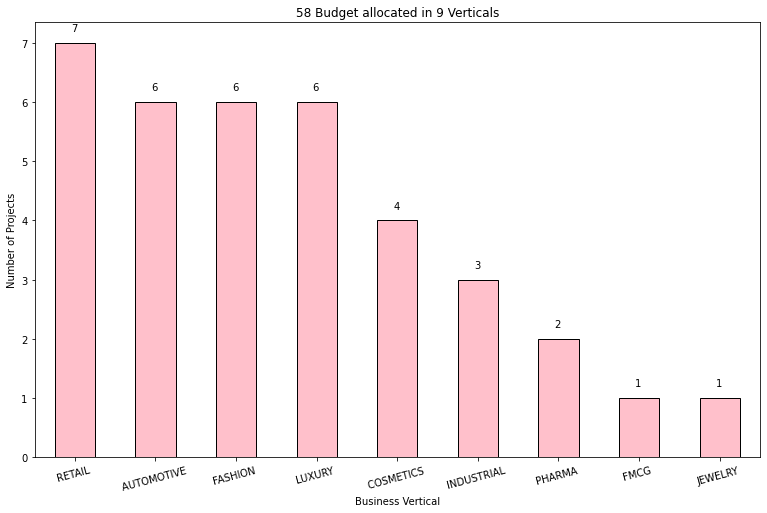

In [10]:
df_bar = pd.DataFrame(df_result.groupby(['VERTICAL'])['ALLOCATION'].sum())
df_bar.sort_values(by = 'ALLOCATION', ascending = False, inplace = True)
ax = df_bar.plot.bar(figsize=(13, 8), edgecolor='black', color = 'pink', y='ALLOCATION', legend= False)
plt.xlabel('Business Vertical')
plt.ylabel('Number of Projects')
plt.xticks(rotation = 15)
plt.title('{} Budget allocated in 9 Verticals'.format(len(df_p)))

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1 +0.2, p.get_height() * 1 + 0.2))

plt.show()

### Budget allocations amounts per Country

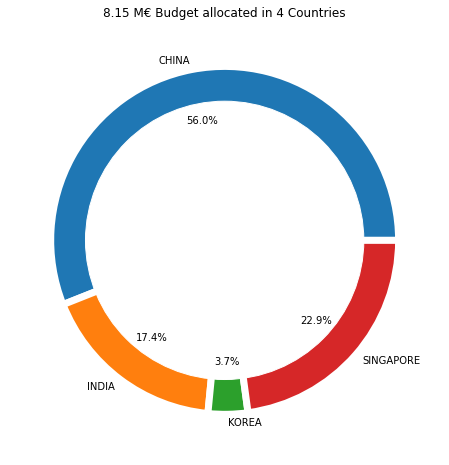

In [11]:
df_budg = pd.DataFrame(df_result.groupby(['COUNTRY'])['TOTAL'].sum()/1e6).round(2)
my_circle = plt.Circle( (0,0), 0.8, color='white')
df_budg.plot.pie(figsize=(8, 8), y='TOTAL', legend= False, pctdistance=0.7,
                                          autopct='%1.1f%%', labeldistance=1.05, 
                                          wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.xlabel('Business Vertical')
plt.ylabel('(M€)')
plt.title('{:.2f} M€ Budget allocated in 4 Countries'.format(df_p['TOTAL'].sum()/1e6))

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

### Budget allocation for each management objective

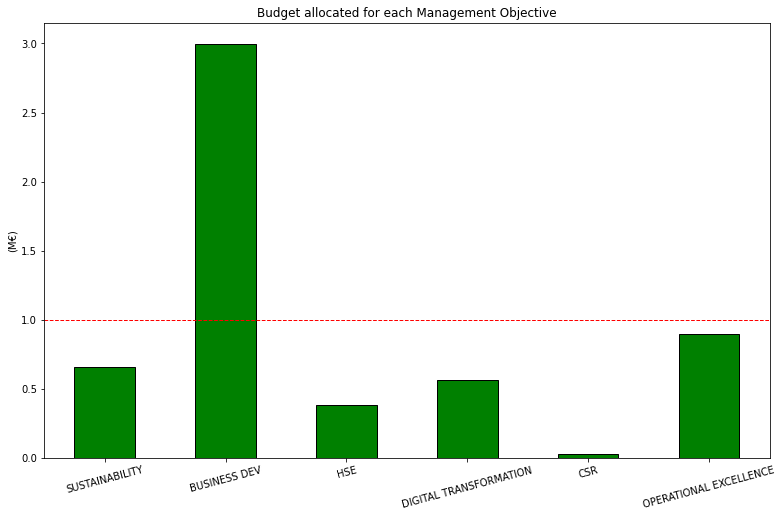

In [12]:
OBJ = ['SUSTAINABILITY', 'BUSINESS DEV', 'HSE', 'DIGITAL TRANSFORMATION',
       'CSR', 'OPERATIONAL EXCELLENCE']
df_obj = df_result.copy()
for COL in OBJ:
    df_obj[COL] = df_obj[COL] * df_obj['TOTAL']
df_obj = pd.DataFrame(df_obj[OBJ].sum(axis = 0)/1E6)
df_obj.columns = ['BUDGET']
ax = df_obj.plot.bar(figsize=(13, 8), edgecolor='black', y='BUDGET', color = 'green', legend= False)
plt.xticks(rotation = 15)
plt.ylabel('(M€)')
plt.title('Budget allocated for each Management Objective'.format(len(df_p)))
ax.axhline(1 , color="red", linestyle="--", linewidth = 1.0)
plt.show()

## Model 2: Management Guidelines

In [13]:
# 1. Initialize Class
model = LpProblem("Budget_Planning_MaxROI", LpMaximize)

# 2. Define Decision Variables
# Project Name
projects = list(df_p['PROJECT DESCRIPTION'].values)
# Project ROI
roi = list(df_p['ROI'].values)
# Dictionary
P =  LpVariable.dicts("P", [j for j in range(len(projects))], lowBound=0, upBound=None, cat='Binary')
# 3. Define Objective Function
# Total ROI
model += lpSum([roi[i] * P[i] for i in range(len(projects))])

# 4. Define Constraints
# Budget limit per year
BUDGET_LIMIT = [1250000, 1500000, 1750000]
for j in range(3):
    model += lpSum([P[i] * df_p.loc[i, 'YEAR {}'.format(j+1)] for i in range(len(projects))]) <= BUDGET_LIMIT[j]
# This is where it's different from the last model
O = df_p['OPERATIONAL EXCELLENCE'].values * 1 
S = df_p['SUSTAINABILITY'].values * 1 
D = df_p['DIGITAL TRANSFORMATION'].values * 1 

# Management Objectives
BUDGET_MIN = [1000000, 1000000, 1000000]
model += lpSum([P[i] * O[i] * df_p.loc[i, 'TOTAL'] for i in range(len(projects))]) >= BUDGET_MIN[0]
model += lpSum([P[i] * S[i] * df_p.loc[i, 'TOTAL'] for i in range(len(projects))]) >= BUDGET_MIN[1]
model += lpSum([P[i] * D[i] * df_p.loc[i, 'TOTAL'] for i in range(len(projects))]) >= BUDGET_MIN[2]

# Solve Model
status = model.solve()
print(LpStatus[status])
print("Return of Investment = {:,} Euros".format(round(value(model.objective), 2)))

# Results
MAX_BUDGET = sum(BUDGET_LIMIT)/1e6
ACTUAL_BUDGET = round(sum([P[i].varValue * df_p.loc[i, 'TOTAL'] for i in range(len(projects))])/1e6,2)
project_allocation = int(sum([P[i].varValue for i in range(len(projects))]))
LIST_PROJECTS = []
for j in range(len(projects)):
    LIST_PROJECTS.append(P[j].varValue)
    
print('{}/{} Projects Accepted with a Budget Allocation of {:,}/{:,} M€'.format(project_allocation, len(df_p), ACTUAL_BUDGET, MAX_BUDGET))

Optimal
Return of Investment = 909,989.0 Euros
34/58 Projects Accepted with a Budget Allocation of 4.15/4.5 M€


### Add the results

In [14]:
df_result = df_p.copy()
df_result['ALLOCATION'] = LIST_PROJECTS
df_result['TOTAL'] = df_result['ALLOCATION'] * df_result['TOTAL']
df_result['ROI'] = df_result['ALLOCATION'] * df_result['ROI']

### Number of Projects per vertical

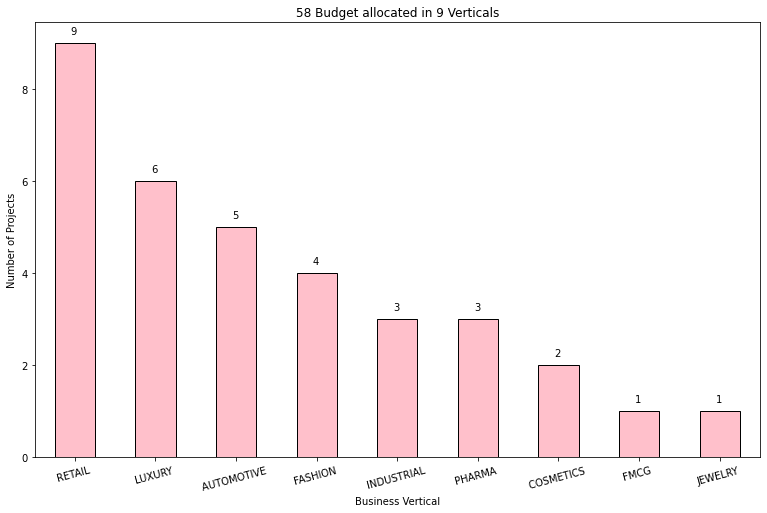

In [15]:
df_bar = pd.DataFrame(df_result.groupby(['VERTICAL'])['ALLOCATION'].sum())
df_bar.sort_values(by = 'ALLOCATION', ascending = False, inplace = True)
ax = df_bar.plot.bar(figsize=(13, 8), edgecolor='black', color = 'pink', y='ALLOCATION', legend= False)
plt.xlabel('Business Vertical')
plt.ylabel('Number of Projects')
plt.xticks(rotation = 15)
plt.title('{} Budget allocated in 9 Verticals'.format(len(df_p)))

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1 +0.2, p.get_height() * 1 + 0.2))

plt.show()

### Budget allocations amounts per Country

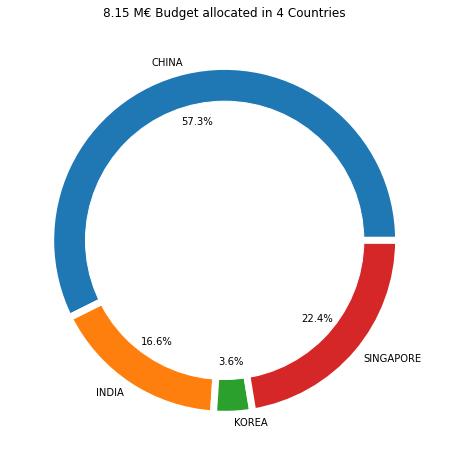

In [16]:
df_budg = pd.DataFrame(df_result.groupby(['COUNTRY'])['TOTAL'].sum()/1e6).round(2)
my_circle = plt.Circle( (0,0), 0.8, color='white')
df_budg.plot.pie(figsize=(8, 8), y='TOTAL', legend= False, pctdistance=0.7,
                                          autopct='%1.1f%%', labeldistance=1.05, 
                                          wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.xlabel('Business Vertical')
plt.ylabel('(M€)')
plt.title('{:.2f} M€ Budget allocated in 4 Countries'.format(df_p['TOTAL'].sum()/1e6))

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

### Budget allocation for each management objective

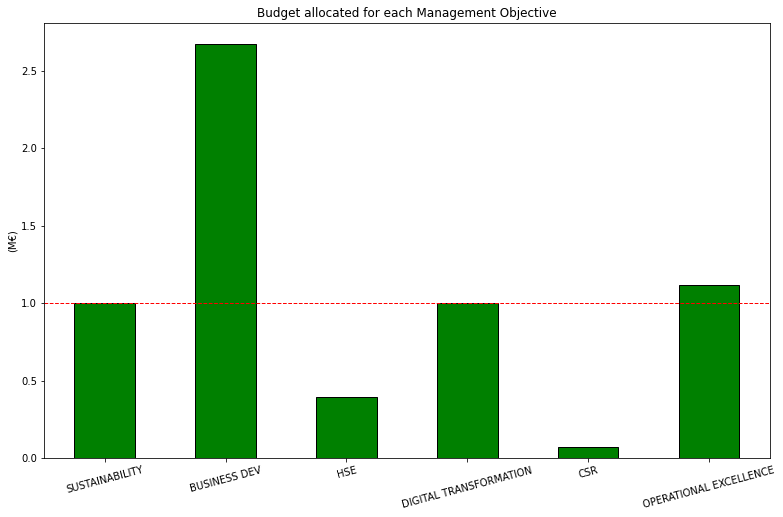

In [17]:
OBJ = ['SUSTAINABILITY', 'BUSINESS DEV', 'HSE', 'DIGITAL TRANSFORMATION',
       'CSR', 'OPERATIONAL EXCELLENCE']
df_obj = df_result.copy()
for COL in OBJ:
    df_obj[COL] = df_obj[COL] * df_obj['TOTAL']
df_obj = pd.DataFrame(df_obj[OBJ].sum(axis = 0)/1E6)
df_obj.columns = ['BUDGET']
ax = df_obj.plot.bar(figsize=(13, 8), edgecolor='black', y='BUDGET', color = 'green', legend= False)
plt.xticks(rotation = 15)
plt.ylabel('(M€)')
plt.title('Budget allocated for each Management Objective'.format(len(df_p)))
ax.axhline(1 , color="red", linestyle="--", linewidth = 1.0)
plt.show()

### Selected Projects

In [18]:
df_result[df_result['ALLOCATION']==1][df_result.columns[0:7]]

,PROJECT NUMBER,PROJECT DESCRIPTION,CUSTOMER,VERTICAL,WH,SQM,COUNTRY
1,2,ADDITIONAL SPACE WITH RACKING-LUXURY 4,LUXURY 4,LUXURY,WH06,1200,CHINA
2,3,ADDITIONAL SPACE WITH RACKING-AUTOMOTIVE 1,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE
4,5,ADDITIONAL SPACE WITH RACKING-FASHION 2,FASHION 2,FASHION,WH01,500,CHINA
9,10,AUTOMATED ORDER PICKER (PRODUCTIVITY)-JEWELRY 1,JEWELRY 1,JEWELRY,WH01,2000,CHINA
10,11,"AUTOMATED WRAPPING MACHINE (SUSTAINABILITY, PR...",LUXURY 1,LUXURY,WH01,10000,CHINA
11,12,"AUTOMATED WRAPPING MACHINE (SUSTAINABILITY, PR...",RETAIL 4,RETAIL,WH05,1000,CHINA
12,13,AUTOMATIC DIMENSIONING SYSTEM TO MEASURE INBO...,PHARMA 2,PHARMA,WH17,10000,INDIA
13,14,AUTONOMOUS ROBOT FOR INVENTORY STOCK COUNT (PR...,PHARMA 2,PHARMA,WH17,10000,INDIA
14,15,AUTONOMOUS SCALE FOR PARCEL DOUBLE CHECK BEFOR...,AUTOMOTIVE 1,AUTOMOTIVE,WH02,4500,SINGAPORE
16,17,"COLD ROOM RENOVATION (CSR, BUSINESS OPPORTUNIT...",RETAIL 3,RETAIL,WH04,2500,CHINA
